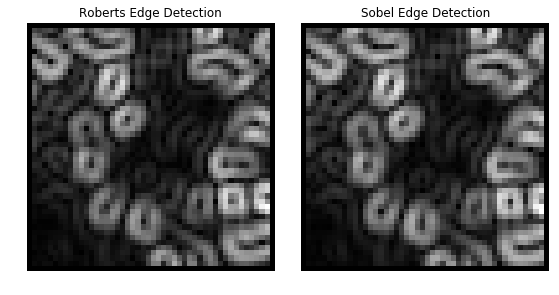

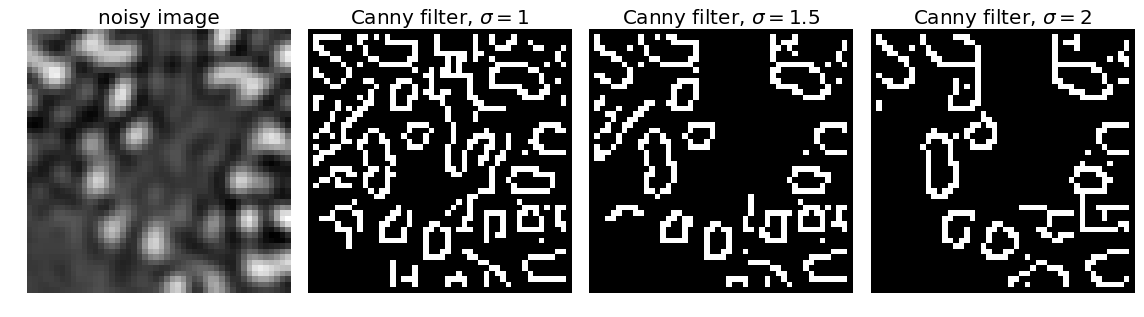

Text(0.5,1,'Unwrapped minus original')

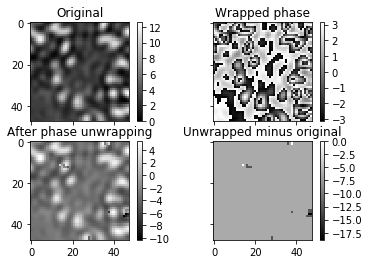

In [2]:
import imageio
import skimage.io as save
from skimage import img_as_uint
import numpy as np
import matplotlib.pyplot as plt

#formatting the png images from 3D to 2D arrays so that they can be used in skikit
im = imageio.imread('image.png')
image1 = im[:,:,0]

################
# edge
################
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(image1)
'''sobel looks most promising'''
edge_sobel = sobel(image1)
save.imsave('edge_sobel.png', edge_sobel)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

###############
# noisy edge
###############
from scipy import ndimage as ndi
from skimage import feature

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image1)
'''sigma=1.5 looks most promising'''
edges2 = feature.canny(image1, sigma=1.5)
edges3 = feature.canny(image1, sigma=2)
save.imsave("noisy_edge.png", img_as_uint(edges2))

# display results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 6),
                                    sharex=True, sharey=True)

ax1.imshow(image1, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=1.5$', fontsize=20)

ax4.imshow(edges3, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Canny filter, $\sigma=2$', fontsize=20)

fig.tight_layout()

plt.show()

########################
# contours
########################
# using skiimage.measure.find_contours() does not seem to work, it finds no contours

########################
# phase unwrapping
########################
from skimage import img_as_float, color, exposure
from skimage.restoration import unwrap_phase

# Load an image as a floating-point grayscale
image = color.rgb2gray(img_as_float(image1))
# Scale the image to [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Create a phase-wrapped image in the interval [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
###save.imsave('image_wrapped.png', image_wrapped)
# Perform phase unwrapping
image_unwrapped = unwrap_phase(image_wrapped)
###save.imsave('image_unwrapped.png', image_unwrapped)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(image, cmap='gray', vmin=0, vmax=4 * np.pi), ax=ax1)
ax1.set_title('Original')

'''either wrapped or unwrapped look quite promising'''
fig.colorbar(ax2.imshow(image_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped, cmap='gray'), ax=ax3)
ax3.set_title('After phase unwrapping')

fig.colorbar(ax4.imshow(image_unwrapped - image, cmap='gray'), ax=ax4)
ax4.set_title('Unwrapped minus original')
